In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [4]:
df = pd.read_csv("input/Pokemon.csv").drop('Type 2', axis=1)
df['TypeId'] = df['Type 1'].rank(method='dense').astype(int)
columns = df.columns.tolist()
columns[0] = 'id'
df.columns = columns
df.head()

,id,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,TypeId
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,10
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,10
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,10
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,10
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,7


In [5]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'Legendary']
targets  = ['TypeId']

In [7]:
from sklearn.preprocessing import StandardScaler

df_norm = df.copy()
X = np.vstack([df_norm[features]])
y = np.hstack([df_norm[targets]])

In [8]:
X_tsne = TSNE(random_state=200).fit_transform(X)

In [20]:
def plot_3d_scatter(A, elevation=30, azimuth=120):
    """ Create 3D scatterplot """
    
    maxpts=1000
    fig = plt.figure(1, figsize=(9, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elevation, azim=azimuth)
    ax.set_xlabel('component 0')
    ax.set_ylabel('component 1')
    ax.set_zlabel('component 2')

    # plot subset of points
    rndpts = np.sort(np.random.choice(A.shape[0], min(maxpts,A.shape[0]), replace=False))
    coloridx = np.unique(A.iloc[rndpts]['class'], return_inverse=True)
    colors = coloridx[1] / len(coloridx[0])   
    
    sp = ax.scatter(A.iloc[rndpts,0], A.iloc[rndpts,1], A.iloc[rndpts,2]
               ,c=colors, cmap="jet", marker='o', alpha=0.6
               ,s=50, linewidths=0.8, edgecolor='#BBBBBB')

    plt.show()

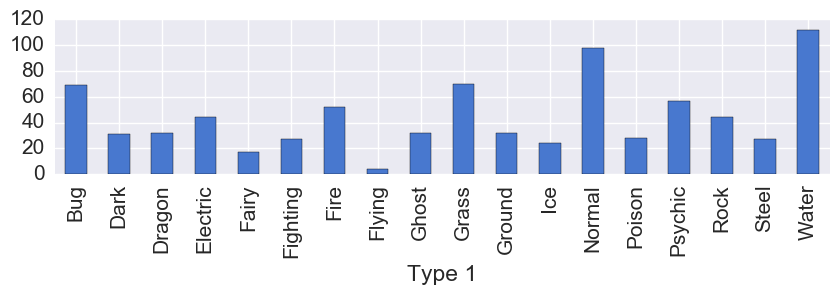

In [24]:
ax = df_norm.groupby('Type 1').size().plot(kind='bar', figsize=(10,2))

In [26]:
dfs = StandardScaler().fit(df[features]).transform(df[features])

In [28]:
from scipy.linalg import svd
u, s, vt = svd(dfs)

0 SVs are NaN
1 SVs less than 1e-12


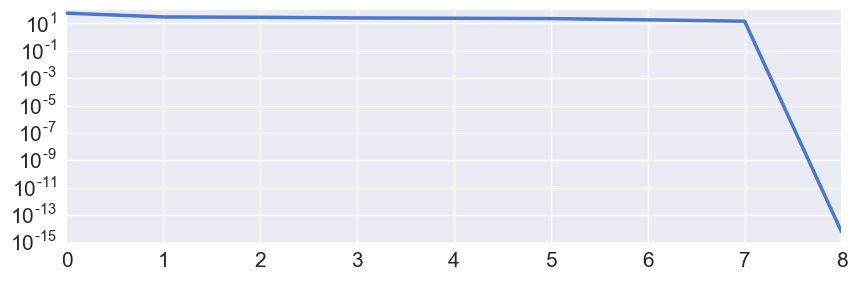

In [29]:
ax = pd.Series(s).plot(figsize=(10,3), logy=True)
print('{} SVs are NaN'.format(np.isnan(s).sum()))
print('{} SVs less than 1e-12'.format(len(s[s < 1e-12])))

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.html.widgets import interactive, fixed
df_norm['class'] = df_norm['TypeId']
interactive(plot_3d_scatter, A=fixed(df_norm), elevation=30, azimuth=120)

ValueError: could not convert string to float: Volcanion

AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

In [38]:
dfs

array([[-0.97676549, -0.95062622, -0.92490618, ..., -0.80150318,
        -1.39963712, -0.29738086],
       [-0.25108843, -0.3628221 , -0.5241302 , ..., -0.28501525,
        -1.39963712, -0.29738086],
       [ 0.74984544,  0.42091674,  0.09244823, ...,  0.40363531,
        -1.39963712, -0.29738086],
       ..., 
       [ 1.37542912,  0.42091674,  0.95565803, ...,  0.05931003,
         1.61195431,  3.36269123],
       [ 2.04271837,  0.42091674,  2.49710411, ...,  0.40363531,
         1.61195431,  3.36269123],
       [ 1.37542912,  0.42091674,  0.95565803, ...,  0.05931003,
         1.61195431,  3.36269123]])